# Homework 5 - Explore Wikipedia's hyperlinks network

Useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [3]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")

In [4]:
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [6]:
dataset.columns

Index(['Unnamed: 0', '0', '1'], dtype='object')

Change the columns name; 0 is the **source** and 1 is the **target**

In [7]:
dataset.columns=['Index','Source','Target']

Make the first column the index

In [8]:
dataset.set_index('Index' , inplace = True)

In [9]:
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


### RQ1. Create the graph
Create two dictionaries for the nodes of the graph; one is for the indegree node, the other one is for the outdegree node. Note that the dictionaries contain the unique element.

In [10]:
in_degree = {v: [] for v in set(dataset.Source)}
out_degree = {v: [] for v in set(dataset.Target)}

In [11]:
for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_degree[source].append(target)
    out_degree[target].append(source)

Visualize how many indegree and outdegree has the graph

In [12]:
n_art_outlink = len(out_degree)
print(n_art_outlink)

75467


In [13]:
n_art_inlink = len(in_degree)
print(n_art_inlink)

90920


#### Is the graph directed?

In [12]:
if (len(set(dataset.Source).intersection(set(dataset.Target)))!=0):
     print ('The graph is directed')

The graph is directed


#### How many articles are we considering?

In [14]:
nodes = set(dataset.Source).union(set(dataset.Target))
n_nodes = len(nodes)
print(n_nodes)

98343


#### How many hyperlinks between pages exist?

In [15]:
n_edges = len(dataset)
print(n_edges)

483094


#### Compute the average number of links in an arbitrary page

In [16]:
n_outlinks = []
for node in nodes:
    try:
        out_deg = len(out_degree[node])
    except:
        out_deg = 0
    n_outlinks.append(out_deg)
avg_outlink = np.mean(n_outlinks)
print('The average number of outlinks in a page is: ',round(avg_outlink))

The average number of outlinks in a page is:  5


#### What is the graph density?
For directed graph the density is given by: $\frac{|E|}{|V|(|V|-1)}$



In [17]:
density = (n_edges/(n_nodes*(n_nodes-1)))
print(density)

4.9951571365597335e-05


#### The graph is dense or sparse?

In [18]:
print('Max number of edges:',n_nodes**2)
print('Number of edges: ',n_edges)

Max number of edges: 9671345649
Number of edges:  483094


The graph is sparse.

#### Visualize the nodes' degree distribution

At first we save the connections of each node into a list, then we store that list into a pandas Series in order to plot it.

In [18]:
connections = []
for node in nodes:
    try:
        in_deg = len(in_degree[node])
    except:
        in_deg = 0
    try:
        out_deg = len(out_degree[node])
    except:
        out_deg = 0
    connections.append(in_deg+out_deg)

In [19]:
series=pd.Series(connections)

degrees=series.groupby(by=connections).count()
d_sum=np.sum(degrees)
degrees=degrees[0:50]   # the first 50 degrees values are enough to give a true representation
degrees=degrees/d_sum

degrees_sum=0

cdf_list=[]

for x in degrees:  
    degrees_sum=(degrees_sum+x)   
    cdf_list.append(degrees_sum)

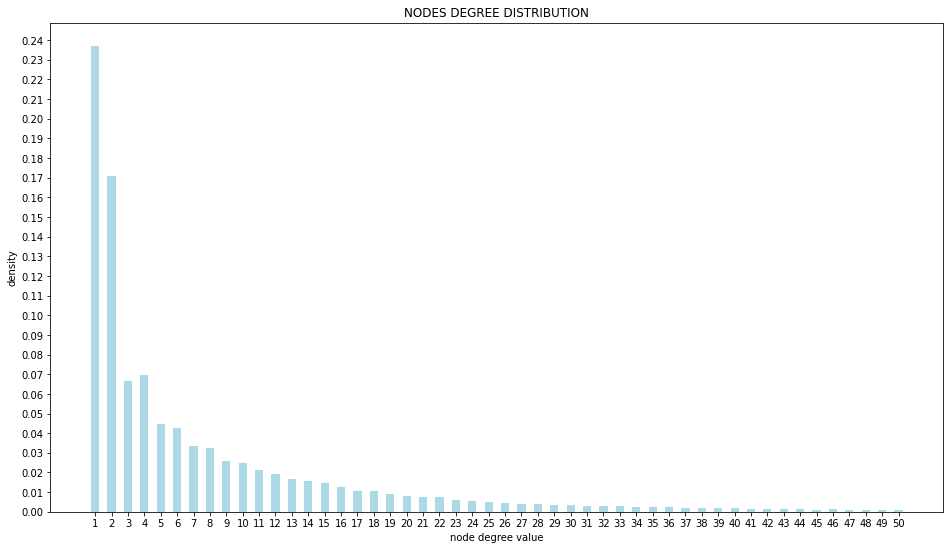

In [20]:
plt.figure(figsize=(16,9));

plt.xticks(np.arange(1,51,1));

plt.yticks(np.arange(0,1,0.01));

plt.xlabel('node degree value');

plt.ylabel('density');

plt.title('nodes degree distribution'.upper());

plt.bar(degrees.index,degrees,color='lightblue',width=0.5);

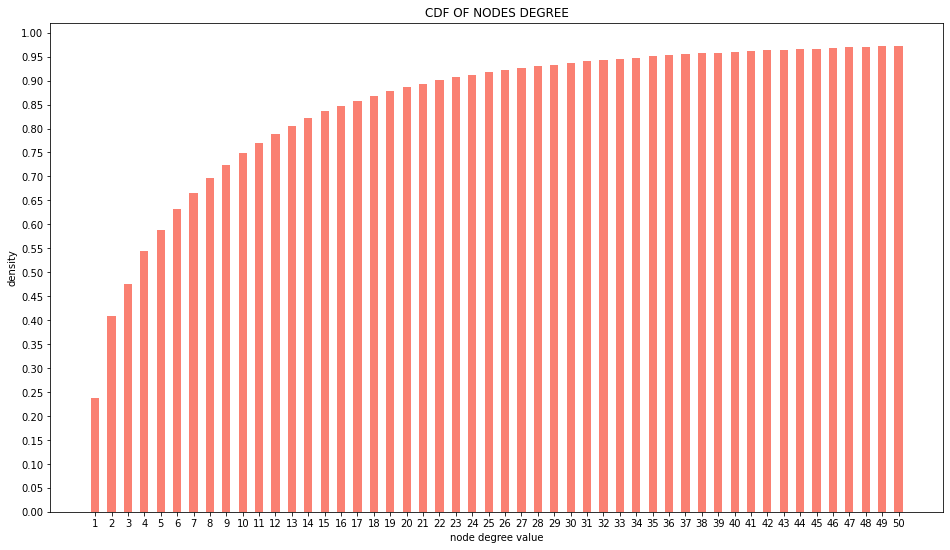

In [21]:
plt.figure(figsize=(16,9));

plt.xticks(np.arange(1,51,1));

plt.yticks(np.arange(0,1.05,0.05));

plt.xlabel('node degree value');

plt.ylabel('density');

plt.title('CDF of nodes degree'.upper());

plt.bar(degrees.index,cdf_list,color='salmon',width=0.5);